In [1]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import pandas as pd
plt.style.use("fivethirtyeight")

In [22]:
class Perceptron:
    def __init__(self, eta, epochs, activationFunction):
        self.weights=np.random.rand(3)*1e-4
        print(f"self.weights: {self.weights}")
        self.eta=eta
        self.epochs=epochs
        self.activationFunction=activationFunction
    def fit(self, X, y):
        self.X=X
        self.y=y
        
        X_with_bias=np.c_[self.X, -np.ones((len(self.X),1))]
        print(f"X_with_bias_in fit_fun: \n{X_with_bias}")
        for epoch in range(self.epochs):
            y_hat=self.activationFunction(X_with_bias, self.weights)
            print(f"Predicted Value: \n{y_hat}")
            error=self.y-y_hat
            print(f"Error: \n{error}")
            self.weights=self.weights+self.eta*np.dot(X_with_bias.T, error)
            print(f"Updated weights: \n{self.weights}")
            print("############################\n")
    def predict(self, X):
        X_with_bias=np.c_[X, -np.ones((len(X),1))]
        print(f"X_with_bias_in predict_fun: \n{X_with_bias}")
        return self.activationFunction(X_with_bias, self.weights)
            

In [23]:
activationFunction=lambda inputs, weights: np.where(np.dot(inputs, weights)>0,1,0)
""" Alternatives of lambda function of activationFunction
def activationFunction(inputs, weights):
    z=np.dot(inputs, weights)
    y_hat=np.where(z > 0, 1,0)
    return y_hat
def activationFunction(inputs, weights):
    z=np.dot(inputs, weights)
    if z>0:
        y_hat=1
    else:
        y_hat=0
"""

' Alternatives of lambda function of activationFunction\ndef activationFunction(inputs, weights):\n    z=np.dot(inputs, weights)\n    y_hat=np.where(z > 0, 1,0)\n    return y_hat\ndef activationFunction(inputs, weights):\n    z=np.dot(inputs, weights)\n    if z>0:\n        y_hat=1\n    else:\n        y_hat=0\n'

In [24]:
data={"x1":[0,0,1,1], "x2":[0,1,0,1], "y":[0,0,0,1]}
AND=pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [25]:
X=AND.drop("y", axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [26]:
y=AND["y"]
y.to_frame()

,y
0,0
1,0
2,0
3,1


In [27]:
model=Perceptron(eta=0.01, epochs=10,activationFunction=activationFunction)

self.weights: [7.22750316e-05 9.42301997e-05 8.49733350e-05]


In [28]:
model.fit(X,y)

X_with_bias_in fit_fun: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
Predicted Value: 
[0 1 0 1]
Error: 
0    0
1   -1
2    0
3    0
Name: y, dtype: int64
Updated weights: 
[ 7.22750316e-05 -9.90576980e-03  1.00849733e-02]
############################

Predicted Value: 
[0 0 0 0]
Error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights: 
[1.00722750e-02 9.42301997e-05 8.49733350e-05]
############################

Predicted Value: 
[0 1 1 1]
Error: 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
Updated weights: 
[ 7.22750316e-05 -9.90576980e-03  2.00849733e-02]
############################

Predicted Value: 
[0 0 0 0]
Error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights: 
[1.00722750e-02 9.42301997e-05 1.00849733e-02]
############################

Predicted Value: 
[0 0 0 1]
Error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights: 
[1.00722750e-02 9.42301997e-05 1.00849733e-02]
############################

Pre

In [29]:
model.predict(X)

X_with_bias_in predict_fun: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]


array([0, 0, 0, 1])

# OR Gate

In [30]:
data={"x1":[0,0,1,1], "x2":[0,1,0,1], "y":[0,1,1,1]}
OR=pd.DataFrame(data)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [31]:
X=OR.drop("y", axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [33]:
y=OR["y"]
y.to_frame()

,y
0,0
1,1
2,1
3,1


In [34]:
model=Perceptron(eta=0.01, epochs=10,activationFunction=activationFunction)

self.weights: [9.62865577e-05 1.71501265e-05 9.31334344e-05]


In [35]:
model.fit(X,y)

X_with_bias_in fit_fun: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
Predicted Value: 
[0 0 1 1]
Error: 
0    0
1    1
2    0
3    0
Name: y, dtype: int64
Updated weights: 
[ 9.62865577e-05  1.00171501e-02 -9.90686657e-03]
############################

Predicted Value: 
[1 1 1 1]
Error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights: 
[9.62865577e-05 1.00171501e-02 9.31334344e-05]
############################

Predicted Value: 
[0 1 1 1]
Error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights: 
[9.62865577e-05 1.00171501e-02 9.31334344e-05]
############################

Predicted Value: 
[0 1 1 1]
Error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights: 
[9.62865577e-05 1.00171501e-02 9.31334344e-05]
############################

Predicted Value: 
[0 1 1 1]
Error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights: 
[9.62865577e-05 1.00171501e-02 9.31334344e-05]
############################

Predic

In [36]:
model.predict(X)

X_with_bias_in predict_fun: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]


array([0, 1, 1, 1])

# X-OR Gate

In [38]:
data={"x1":[0,0,1,1], "x2":[0,1,0,1], "y":[0,1,1,0]}
X_OR=pd.DataFrame(data)
X_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [39]:
X=X_OR.drop("y", axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [42]:
y=X_OR["y"]
y.to_frame()

,y
0,0
1,1
2,1
3,0


In [43]:
model=Perceptron(eta=0.01, epochs=10,activationFunction=activationFunction)

self.weights: [3.14334543e-06 6.41360798e-05 7.78232447e-05]


In [44]:
model.fit(X,y)

X_with_bias_in fit_fun: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
Predicted Value: 
[0 0 0 0]
Error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
Updated weights: 
[ 0.01000314  0.01006414 -0.01992218]
############################

Predicted Value: 
[1 1 1 1]
Error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
Updated weights: 
[3.14334543e-06 6.41360798e-05 7.78232447e-05]
############################

Predicted Value: 
[0 0 0 0]
Error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
Updated weights: 
[ 0.01000314  0.01006414 -0.01992218]
############################

Predicted Value: 
[1 1 1 1]
Error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
Updated weights: 
[3.14334543e-06 6.41360798e-05 7.78232447e-05]
############################

Predicted Value: 
[0 0 0 0]
Error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
Updated weights: 
[ 0.01000314  0.01006414 -0.01992218]
############################

Predicted Value: 
[1 1 1 1]
Error: 


In [45]:
model.predict(X)

X_with_bias_in predict_fun: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]


array([0, 0, 0, 0])

# Analysis with graph
#### AND GATE

<AxesSubplot:xlabel='x1', ylabel='x2'>

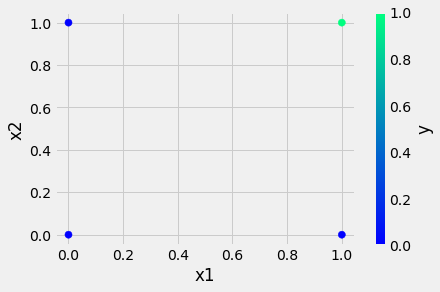

In [49]:
AND.plot(kind='scatter', x="x1", y="x2", c="y",s=50, cmap="winter")

<AxesSubplot:xlabel='x1', ylabel='x2'>

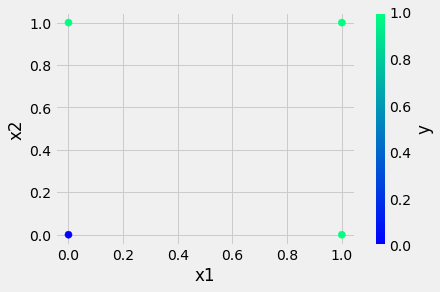

In [50]:
OR.plot(kind='scatter', x="x1", y="x2", c="y",s=50, cmap="winter")